In [178]:
import numpy as np
import pandas as pd
import ruptures as rpt
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.style.use('dark_background')

df = pd.read_csv('data/clean_data.csv')

cols = ['accuracy_1_%', 'accuracy_2_%', 'accuracy_3_%', 'accuracy_all_%', 
        'accuracy_1_avg', 'accuracy_2_avg', 'accuracy_3_avg', 'accuracy_all_avg']
df = df[cols]

df = (df - df.min()) / (df.max() - df.min())

Text(0.5, 1.0, 'accuracy_1_%')

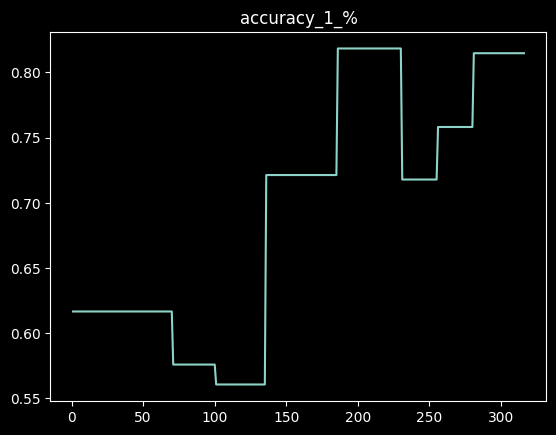

In [179]:
def in_period(x):
    flags = [x > diff_points[i] for i in range(len(diff_points)-1)]
    return sum(flags)

diff_points = [0, 70, 100, 135, 185, 230, 255, 280, 318]
means = []

target = 'accuracy_1_%'

for i in range(len(diff_points) - 1):
    means.append(df[diff_points[i]:diff_points[i+1]].mean())

x = list(range(1, 317))

plt.plot(x, [means[in_period(xi)-1][target] for xi in x])
plt.title(target)

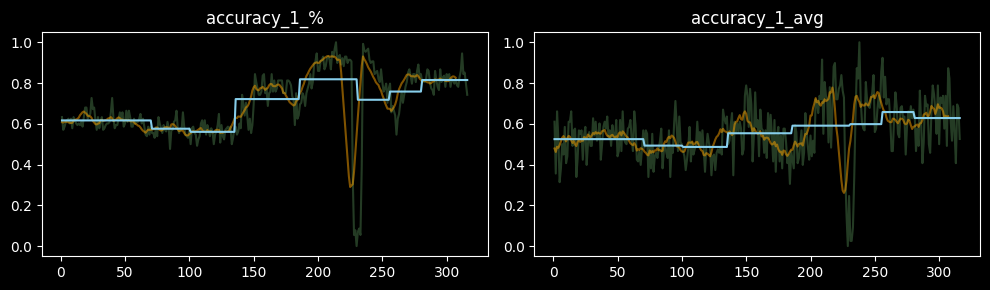

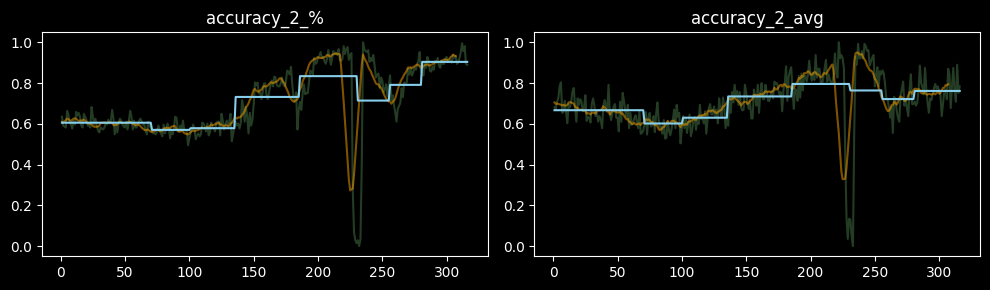

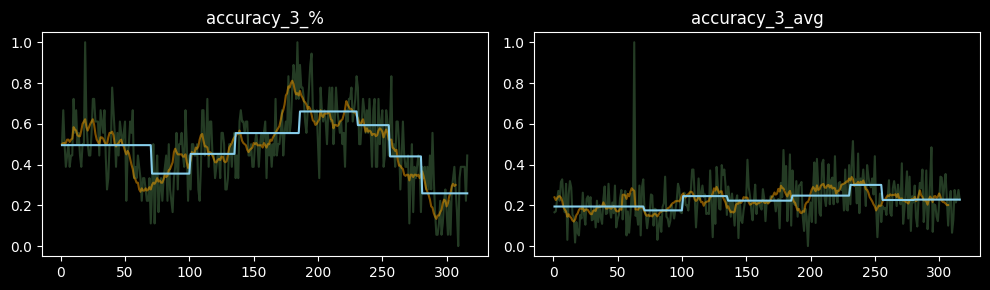

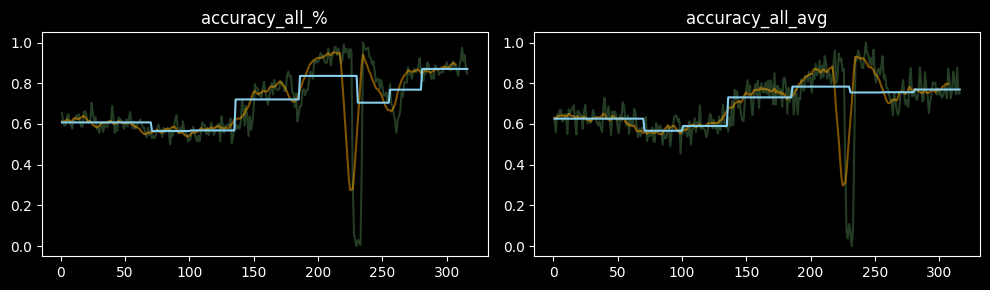

In [180]:
col_pairs = [['accuracy_1_%', 'accuracy_1_avg'],
            ['accuracy_2_%', 'accuracy_2_avg'],
            ['accuracy_3_%', 'accuracy_3_avg'],
            ['accuracy_all_%', 'accuracy_all_avg']]


x = list(range(1, 317))
alpha = 0.5

for i in range(4):

    col = col_pairs[i]

    plt.figure(figsize=(10, 3))

    plt.subplot(1, 2, 1)
    plt.plot(x, [means[in_period(xi)-1][col[0]] for xi in x], color='skyblue', zorder=2)
    plt.plot(x, df[1:317][col[0]], color='lightgreen', alpha=alpha/2, zorder=0)

    for window_size in [10]:
        smoothed = df[1:317][col[0]].rolling(window=window_size).mean()
        smoothed = [x for x in smoothed if not np.isnan(x)]
        plt.plot(x[0:307], smoothed, alpha=alpha, color='orange', zorder=1)


    plt.title(col[0])


    plt.subplot(1, 2, 2)
    plt.plot(x, [means[in_period(xi)-1][col[1]] for xi in x], color='skyblue', zorder=2)
    plt.plot(x, df[1:317][col[1]], color='lightgreen', alpha=alpha/2, zorder=0)
    
    for window_size in [10]:
        smoothed = df[1:317][col[1]].rolling(window=window_size).mean()
        smoothed = [x for x in smoothed if not np.isnan(x)]
        plt.plot(x[0:307], smoothed, alpha=alpha, color='orange', zorder=1)

    plt.title(col[1])
            

    plt.tight_layout()
    plt.show()